### Box Plots and their uses - an investigation

Box Plots are ...
Box Plots were 
Box Plots are best used for 


In [2]:
#Pandas is a Python package for data frames
import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/paulacduffy/boxplotsproject/master/Data/salary.csv")
df


,Category,Salary,Gender
0,ACADEMIC,51502,Male
1,ACADEMIC,51502,Male
2,ACADEMIC,51502,Female
3,ACADEMIC,51502,Female
4,ACADEMIC,48840,Male
5,ACADEMIC,47504,Male
6,ACADEMIC,50178,Male
7,ACADEMIC,51502,Male
8,ACADEMIC,50178,Male
9,ACADEMIC,46165,Female


<function matplotlib.pyplot.show>

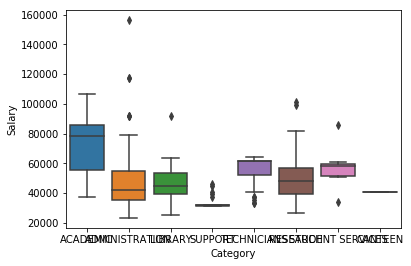

In [9]:
%matplotlib inline
sns.boxplot(x="Category", y="Salary", data=df)
plt.show